<a href="https://colab.research.google.com/github/kiryu-3/Prmn2023/blob/main/Python/Python_Machine/Machine_Learning_9_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 主成分分析ー知識編

In [ ]:
# 最初にインポートしてください
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso, LinearRegression, LogisticRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, r2_score, log_loss
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.model_selection import KFold, RepeatedKFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml, load_iris
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, label_binarize
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
import statsmodels.api as sma
from scipy.stats import hmean

## 次元削減

特徴量の数が$n$、データの数がmとした時の$m×n$のデータ行列における次元を削減する処理を、  
**次元削減**といいます。

正則化項を使った**Lasso**や**Ridge**といったアルゴリズム（参考：[こちら](https://datawokagaku.com/lasso/ )）は、  
特徴量を選択するものなので、次元削減の手法の一つと言えます。



## 主成分分析

**PCA（主成分分析）**は、高次元から低次元へと変換をするアルゴリズムです。  
例えば以下のような感じです。


（参考：https://shorturl.at/cfoCK ）

![](https://imgur.com/O3JFPSR.png)

次元を変換する際は、全ての特徴量が必要になるため、  
あくまでも次元だけを削減する形になります。

そのため、Lassoのような特徴量選択としての用途は限定的となります。


### PCAが必要なケース

PCAを使うケースとして主に考えられるのが、以下の2点です。


1.   処理の高速化
2.   データの可視化



#### 処理の高速化

最近はコンピュータの性能が高くなっているので、  
いろんなセンサからデータを取ったり、何でもかんでもデータ化されるような時代になっています。

そのため、モデルを作る際に、特徴量がたくさんあるというケースが増えてきています。

PCAをすると、高次元のデータを低次元で扱うことができるようになるのでメモリ節約になり、  
機械学習モデルの学習コストを大幅に下げることができます。

#### データの可視化

多次元のデータを可視化するのは、次元数によっては難しいです。  
平面で可視化できるのはせいぜい3次元のデータまでです。

PCAをすることで、多次元のデータも2次元や3次元にして、  
簡単にデータを可視化することができます。  
（データの分布を確認する際に、まずはPCAを行うことが現場では？多いようです）

### 主成分

「データを最もよく表している軸」が、**主成分(Principal Component)**です。



もう少し具体的に言うと、「"データから軸の距離"の合計が最小になる軸」になります。  
例えば以下のような感じです。


（参考：https://shorturl.at/inwH7 ）

![](https://imgur.com/Qx47Gdi.png)

多次元のデータを圧縮するには、第1主成分、第2主成分...のように主成分を抽出します。

第n主成分は、第n-1主成分と直行する軸の中で最も分散が大きい軸となります。

（参考：https://shorturl.at/bC246 ）

![](https://imgur.com/F8bO4CZ.png)

### Pythonで主成分分析

PythonでPCAを実行して、実際に次元を圧縮してみます。

今回は、Scikit-learnのデータセット"iris"を利用します。


（参考サイト：[こちら](https://zenn.dev/nekoallergy/articles/scikit-learn-datasets#%E3%82%B5%E3%83%B3%E3%83%97%E3%83%AB%E3%83%87%E3%83%BC%E3%82%BF%E3%81%AE%E7%A8%AE%E9%A1%9E)）

"iris"のデータの説明は以下の通りです。

- 4つのデータがある
  - sepal length（がく片の長さ）
  - sepal width（がく片の幅）
  - petal length（花びらの長さ）
  - petal width（花びらの幅）
- 3種類の分類がある（それぞれ50個）
  - setosa（セトーサ、ヒオウギアヤメ）
  - versicolour（ヴァーシカラー、ブルーフラッグ）
  - virginica（ヴァージニカ、ヴァージニカ）

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target

df["target"][df["target"] == 0] = "setosa"
df["target"][df["target"] == 1] = "sersicolor"
df["target"][df["target"] == 2] = "virginica"

# 目的変数に"target"、説明変数にそれ以外のカラムを指定
x = df.drop('target', axis=1)
y = df['target']

# 説明変数のデータを標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x)
x_scaled = scaler.transform(x)

<ipython-input-105-35e27a66e835>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



PCAを実施する前に、特徴量間のスケールを合わせるために標準化をする必要があります。  

スケールがあっていないと、正しくデータの分散が大きい軸を見つけることができません。

まずは、主成分の数を2として主成分分析を行います。

In [ ]:
from sklearn.decomposition import PCA

# PCA
X2_pc = PCA(n_components=2).fit_transform(x_scaled)

<Axes: xlabel='first component', ylabel='second component'>

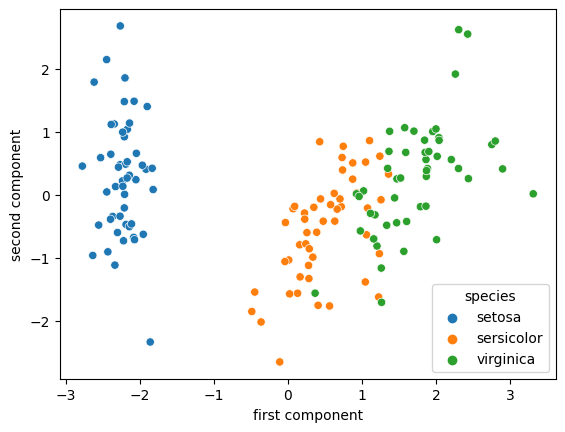

In [ ]:
y_pc = y.values.reshape(-1, 1)
df_pc = pd.DataFrame(np.concatenate([X2_pc, y_pc], axis=1), columns=['first component', 'second component', 'species'])
sns.scatterplot(x='first component', y='second component', hue='species', data=df_pc)

PCAをすることでデータの分布を2次元で表すことができました。

次に、主成分の数を3として主成分分析を行います。

In [ ]:
from sklearn.decomposition import PCA

# PCA
X3_pc = PCA(n_components=3).fit_transform(x_scaled)

In [ ]:
y_pc = y.values.reshape(-1, 1)
df_pc = pd.DataFrame(np.concatenate([X3_pc, y_pc], axis=1), columns=['x', 'y', 'z', 'species'])

In [ ]:
import plotly.express as px

# 3D散布図の作成
fig = px.scatter_3d(df_pc, x='x', y='y', z='z', color='species', labels={'color': 'species'})

fig.add_trace(px.line_3d(df_pc, x='x', y='y', z='z', color='species').data[0])
fig.add_trace(px.line_3d(df_pc, x='x', y='y', z='z', color='species').data[1])
fig.add_trace(px.line_3d(df_pc, x='x', y='y', z='z', color='species').data[2])

# グラフの表示
fig.show()


PCAをすることでデータの分布を3次元で表すことができました。

### 寄与率

各主成分がどれくらいデータを説明できているのかを表したいときに、  
よく使われる指標が**寄与率(explained variance)**です。

第n主成分でデータ全体の何%を説明できているか、を見ることができます。

また、寄与率を第1主成分から累積したものを**累積寄与率**といいます。

特定の寄与率に達するまでに主成分がいくつ必要かを見るのに使います。

### Pythonで寄与率計算

PythonでPCAを実行して、実際に次元を圧縮してみます。

その後、累積寄与率をplotし、最適な次元数を求めます。

とりあえず最初は、次元数=4としてPCAを行います。

In [ ]:
n_components=4
pca = PCA(n_components=n_components)
pca.fit(x_scaled)

PCA(n_components=4)

まずは寄与率を取得してみます。

In [ ]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

第1主成分でデータ全体の約73%を説明できており、  
第2主成分でデータ全体の約23%を説明できており、  
第3主成分では約4%ほどしかデータを説明できていないということが分かります。

次に、累積寄与率をplotします。簡単にできます。

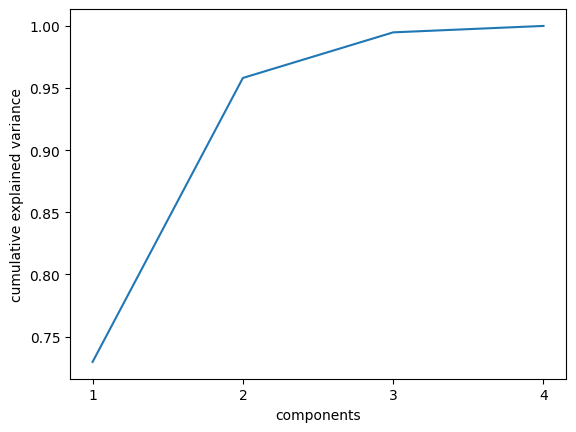

In [ ]:
plt.plot(range(1, n_components+1), np.cumsum(pca.explained_variance_ratio_))
plt.xticks(range(1, n_components+1))
plt.xlabel('components')
plt.ylabel('cumulative explained variance')
plt.show()

今回は、次元数が2か3で主成分分析を行うと、データがしっかり説明できそうです。